## QuantumGates

In [ ]:
!pip install qiskit
!pip install pylatexenc

     |████████████████████████████████| 8.5MB 7.3MB/s 
     |████████████████████████████████| 17.6MB 221kB/s 
     |████████████████████████████████| 204kB 46.5MB/s 
     |████████████████████████████████| 204kB 50.0MB/s 
     |████████████████████████████████| 2.1MB 46.2MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 1.0MB 34.2MB/s 
     |████████████████████████████████| 194kB 33.1MB/s 
     |████████████████████████████████| 81kB 7.6MB/s 
     |████████████████████████████████| 583kB 38.2MB/s 
     |████████████████████████████████| 3.2MB 32.5MB/s 
     |████████████████████████████████| 5.5MB 38.4MB/s 
  Created wheel for qiskit: filename=qiskit-0.24.1-cp37-none-any.whl size=2919 sha256=265267b04b78303af18b6e94e505b98ed8503e1ce27def9b14056e035fab2ccb
  Stored in directory: /root/.cache/pip/wheels/4a/3e/be/606704f95c92255208f2c6c571d95cc075a12d8672515ec7a5
  Created wheel for python-constraint: filename=python_constraint-1.4.0-py2

# __Single Qubit Gates__


Previous lesson,  three different simulators:
- unitary_simulator
- qasm_simulator
- statevector_simulator

In [ ]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt


In [ ]:
back_state = BasicAer.get_backend('statevector_simulator')
back_uni = BasicAer.get_backend('unitary_simulator')

The single-qubit gates available are:
- u gates
- Identity gate
- Pauli gates
- Clifford gates
- $C3$ gates
- Standard rotation gates 

__U Gates__

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>U</mi>
  <mo stretchy="false">(</mo>
  <mi>&#x03B8;<!-- θ --></mi>
  <mo>,</mo>
  <mi>&#x03D5;<!-- ϕ --></mi>
  <mo>,</mo>
  <mi>&#x03BB;<!-- λ --></mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mi>R</mi>
  <mi>Z</mi>
  <mo stretchy="false">(</mo>
  <mi>&#x03D5;<!-- ϕ --></mi>
  <mo>&#x2212;<!-- − --></mo>
  <mi>&#x03C0;<!-- π --></mi>
  <mo>/</mo>
  <mn>2</mn>
  <mo stretchy="false">)</mo>
  <mi>R</mi>
  <mi>X</mi>
  <mo stretchy="false">(</mo>
  <mi>&#x03C0;<!-- π --></mi>
  <mo>/</mo>
  <mn>2</mn>
  <mo stretchy="false">)</mo>
  <mi>R</mi>
  <mi>Z</mi>
  <mo stretchy="false">(</mo>
  <mi>&#x03C0;<!-- π --></mi>
  <mo>&#x2212;<!-- − --></mo>
  <mi>&#x03B8;<!-- θ --></mi>
  <mo stretchy="false">)</mo>
  <mi>R</mi>
  <mi>X</mi>
  <mo stretchy="false">(</mo>
  <mi>&#x03C0;<!-- π --></mi>
  <mo>/</mo>
  <mn>2</mn>
  <mo stretchy="false">)</mo>
  <mi>R</mi>
  <mi>Z</mi>
  <mo stretchy="false">(</mo>
  <mi>&#x03BB;<!-- λ --></mi>
  <mo>&#x2212;<!-- − --></mo>
  <mi>&#x03C0;<!-- π --></mi>
  <mo>/</mo>
  <mn>2</mn>
  <mo stretchy="false">)</mo>
</math>

$$
U = \begin{pmatrix}
\cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i\lambda+i\phi}\cos(\theta/2) 
\end{pmatrix}.
$$

In qiskit: 
$$
u3(\theta, \phi, \lambda) = U(\theta, \phi, \lambda) 
$$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  after removing the cwd from sys.path.


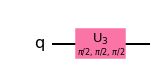

In [ ]:
import numpy as np

qc = QuantumCircuit(1)
qc.u3(np.pi/2, np.pi/2, np.pi/2, [0])

qc.draw('mpl')

In [ ]:
job = execute(qc, back_uni)
job.result().get_unitary(qc)

array([[ 7.07106781e-01+0.00000000e+00j, -4.32978028e-17-7.07106781e-01j],
       [ 4.32978028e-17+7.07106781e-01j, -7.07106781e-01+8.65956056e-17j]])

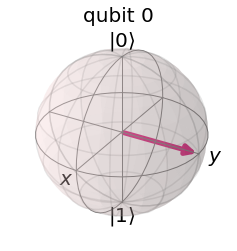

In [ ]:
result = execute(qc,back_state)
state = result.result().get_statevector(qc)
plot_bloch_multivector(state)

The $u2(\phi, \lambda) =u3(\pi/2, \phi, \lambda)$ gate has the matrix form

$$
u2(\phi, \lambda) = 
\frac{1}{\sqrt{2}} \begin{pmatrix}
1 & -e^{i\lambda} \\
e^{i\phi} & e^{i(\phi + \lambda)}
\end{pmatrix}.
$$

This is a useful gate as it allows us to create superpositions.

The $u1(\lambda)= u3(0, 0, \lambda)$ gate has the matrix form

$$
u1(\lambda) = 
\begin{pmatrix}
1 & 0 \\
0 & e^{i \lambda}
\end{pmatrix},
$$

which is useful as it allows us to apply a quantum phase.

__Pauli Gates__

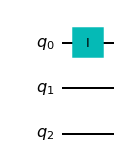

In [ ]:
qc = QuantumCircuit(3)
qc.id(0)
qc.draw('mpl')

In [ ]:
job = execute(qc, back_uni)
job.result().get_unitary(qc)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

The bit-flip gate $X$ is defined as:

$$
X   =  
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}= u3(\pi,0,\pi)
$$

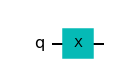

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

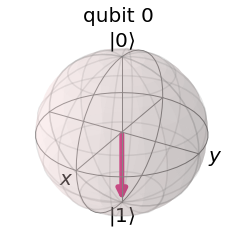

In [ ]:
job = execute(qc, back_state)
state = job.result().get_statevector(qc)
plot_bloch_multivector(state)

The $Y$ gate is defined as:

$$
Y  = 
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}=u3(\pi,\pi/2,\pi/2)
$$

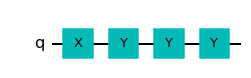

In [ ]:
qc.y(0)
qc.draw('mpl')

The phase-flip gate $Z$ is defined as:

$$
Z = 
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}=u1(\pi)
$$

__Clifford Gates__

Hadamard gate

$$
H = 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix}= u2(0,\pi)
$$

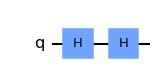

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
qc.h(0)
qc.draw('mpl')

In [ ]:
job = execute(qc, back_uni)
job.result().get_unitary(qc)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

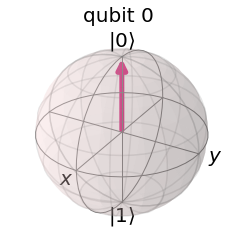

In [ ]:
job = execute(qc, back_state)
state = job.result().get_statevector(qc)
plot_bloch_multivector(state)

$S$ (or, $\sqrt{Z}$ phase) gate

$$
S = 
\begin{pmatrix}
1 & 0\\
0 & i
\end{pmatrix}= u1(\pi/2)
$$

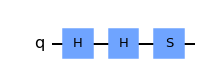

In [ ]:
qc.s(0)
qc.draw('mpl')

 $S^{\dagger}$ (or, conjugate of $\sqrt{Z}$ phase) gate

$$
S^{\dagger} = 
\begin{pmatrix}
1 & 0\\
0 & -i
\end{pmatrix}= u1(-\pi/2)
$$


In [ ]:
qc.sdg(0)
qc.draw()

┌───┐┌───┐┌───┐┌─────┐┌─────┐
q_0: ┤ H ├┤ H ├┤ S ├┤ SDG ├┤ SDG ├
     └───┘└───┘└───┘└─────┘└─────┘

* __Example: Bell States__

__$C3$ gates__

 $T$ (or, $\sqrt{S}$ phase) gate

$$
T = 
\begin{pmatrix}
1 & 0\\
0 & e^{i \pi/4}
\end{pmatrix}= u1(\pi/4) 
$$

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.draw()

┌───┐┌───┐
q_0: ┤ H ├┤ T ├
     └───┘└───┘

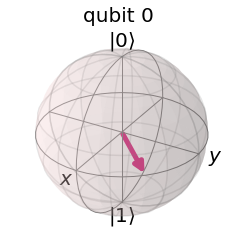

In [ ]:
job = execute(qc, back_state)
state = job.result().get_statevector(qc)
plot_bloch_multivector(state)

$T^{\dagger}$ (or, conjugate of $\sqrt{S}$ phase) gate

$$
T^{\dagger} =  
\begin{pmatrix}
1 & 0\\
0 & e^{-i \pi/4}
\end{pmatrix}= u1(-\pi/4)
$$

In [ ]:
qc.tdg(0)
qc.draw()

┌───┐┌───┐┌─────┐┌─────┐
q_0: ┤ H ├┤ T ├┤ TDG ├┤ TDG ├
     └───┘└───┘└─────┘└─────┘

__Standard Rotations__

The standard rotation gates are those that define rotations around the Paulis $P=\{X,Y,Z\}$. They are defined as 

$$ R_P(\theta) = \exp(-i \theta P/2) = \cos(\theta/2)I -i \sin(\theta/2)P$$

Rotation around X-axis

$$
R_x(\theta) = 
\begin{pmatrix}
\cos(\theta/2) & -i\sin(\theta/2)\\
-i\sin(\theta/2) & \cos(\theta/2)
\end{pmatrix} = u3(\theta, -\pi/2,\pi/2)
$$

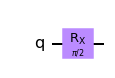

In [ ]:
qc = QuantumCircuit(1)
qc.rx(np.pi/2, 0)
qc.draw('mpl')

In [ ]:
job = execute(qc, back_state)
state = job.result().get_statevector(qc)
plot_bloch_multivector(state)
print(state)

[7.07106781e-01+0.j         4.32978028e-17-0.70710678j]


Rotation around Y-axis

$$
R_y(\theta) =
\begin{pmatrix}
\cos(\theta/2) & - \sin(\theta/2)\\
\sin(\theta/2) & \cos(\theta/2).
\end{pmatrix} =u3(\theta,0,0)
$$

Rotation around Z-axis

$$
R_z(\phi) = 
\begin{pmatrix}
e^{-i \phi/2} & 0 \\
0 & e^{i \phi/2}
\end{pmatrix}\equiv u1(\phi)
$$


# __Multi Qubit Gates__

Given two operators $A$ and $B$ that each act on one qubit, the joint operator $A \otimes B$ acting on two qubits is

$$\begin{equation}
	A\otimes B = 
	\begin{pmatrix} 
		A_{00} \begin{pmatrix} 
			B_{00} & B_{01} \\
			B_{10} & B_{11}
		\end{pmatrix} & A_{01} 	\begin{pmatrix} 
				B_{00} & B_{01} \\
				B_{10} & B_{11}
			\end{pmatrix} \\
		A_{10} 	\begin{pmatrix} 
					B_{00} & B_{01} \\
					B_{10} & B_{11}
				\end{pmatrix} & A_{11} 	\begin{pmatrix} 
							B_{00} & B_{01} \\
							B_{10} & B_{11}
						\end{pmatrix}
	\end{pmatrix},						
\end{equation}$$

Basis vector ordering in Qiskit:

 if the first qubit is in state  ||0⟩  and second is in state  ||1⟩ , their joint state would be  ||01⟩ . Qiskit uses a slightly different ordering of the qubits, in which the qubits are represented from the most significant bit (MSB) on the left to the least significant bit (LSB) on the right (big-endian). This is similar to bitstring representation on classical computers, and enables easy conversion from bitstrings to integers after measurements are performed. For the example just given, the joint state would be represented as  ||10⟩ 



**  Two Qubit Gates : 
- controlled Pauli gates
- controlled Hadamard gate
- controlled rotation gates
- controlled phase gate
- controlled u3 gate
- swap gate

Controlled-X (or, controlled-NOT) gate
The controlled-not gate flips the `target` qubit when the control qubit is in the state $\left|1\right\rangle$. If we take the MSB as the control qubit (e.g. `cx(q[1],q[0])`), then the matrix would look like

$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{pmatrix}. 
$$

However, when the LSB is the control qubit, (e.g. `cx(q[0],q[1])`), this gate is equivalent to the following matrix:

$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0
\end{pmatrix}. 
$$

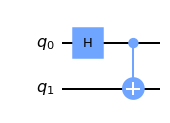

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx([0],[1])
qc.draw('mpl')

In [ ]:
|00>  H  |0>(|0>+|1>)= |00>+|01>
CNOT |00>+|11>


In [ ]:
job = execute(qc, back_state)
state = job.result().get_statevector(qc)
state

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

Controlled rotation gates

#### Controlled rotation around Z-axis

Perform rotation around Z-axis on the target qubit if the control qubit (here LSB) is $\left|1\right\rangle$.

$$
C_{Rz}(\lambda) = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & e^{-i\lambda/2} & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{i\lambda/2}
\end{pmatrix}
$$

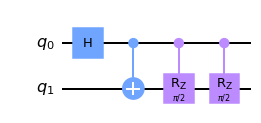

In [ ]:
qc.crz(np.pi/2, [0],[1])
qc.draw('mpl')

Controlled phase rotation

Perform a phase rotation if both qubits are in the $\left|11\right\rangle$ state. The matrix looks the same regardless of whether the MSB or LSB is the control qubit.

$$
C_{u1}(\lambda) = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{i\lambda}
\end{pmatrix}
$$

SWAP gate

The SWAP gate exchanges the two qubits. It transforms the basis vectors as

$$\left|00\right\rangle \rightarrow \left|00\right\rangle~,~\left|01\right\rangle \rightarrow \left|10\right\rangle~,~\left|10\right\rangle \rightarrow \left|01\right\rangle~,~\left|11\right\rangle \rightarrow \left|11\right\rangle,$$

which gives a matrix representation of the form

$$
\mathrm{SWAP} = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1
\end{pmatrix}.
$$

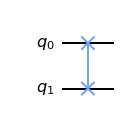

In [ ]:
qc= QuantumCircuit(2)
qc.swap([0],[1])
qc.draw('mpl')

* __Three Qubit Gates__: 


$$\left|abc\right\rangle : \underset{\text{qubit 2}}{\left|a\right\rangle}\otimes \underset{\text{qubit 1}}{\left|b\right\rangle}\otimes \underset{\text{qubit 0}}{\left|c\right\rangle}.$$

Toffoli gate ($ccx$ gate)

The [Toffoli gate](https://en.wikipedia.org/wiki/Quantum_logic_gate#Toffoli_(CCNOT)_gate) flips the third qubit if the first two qubits (LSB) are both $\left|1\right\rangle$:

$$\left|abc\right\rangle \rightarrow \left|bc\oplus a\right\rangle \otimes \left|b\right\rangle \otimes \left|c\right\rangle.$$

In matrix form, the Toffoli gate is
$$
C_{CX} = 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0
\end{pmatrix}.
$$

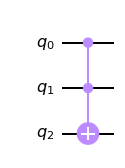

In [ ]:
qc = QuantumCircuit(3)
qc.ccx([0],[1],[2])
qc.draw('mpl')

Controlled swap gate (Fredkin Gate)

The [Fredkin gate](https://en.wikipedia.org/wiki/Quantum_logic_gate#Fredkin_(CSWAP)_gate), or the *controlled swap gate*, exchanges the second and third qubits if the first qubit (LSB) is $\left|1\right\rangle$:

$$ \left|abc\right\rangle \rightarrow \begin{cases} \left|bac\right\rangle~~\text{if}~c=1 \cr \left|abc\right\rangle~~\text{if}~c=0 \end{cases}.$$

In matrix form, the Fredkin gate is

$$
C_{\mathrm{SWAP}} = 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{pmatrix}.
$$

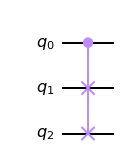

In [ ]:
qc = QuantumCircuit(3)
qc.cswap([0],[1],[2])

qc.draw('mpl')